In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- 봄: 2021년 3, 4, 5
- 여름: 2020년 6, 7, 8
- 가을: 2020년 9, 10, 11
- 겨울: 2020년 12, 2021년 1, 2

In [2]:
df_new1 = pd.read_csv('./data/공공자전거 대여이력_2020.09.csv', engine = 'python')
df_new2 = pd.read_csv('./data/공공자전거 대여이력_2020.10.csv', engine = 'python')
df_new3 = pd.read_csv('./data/공공자전거 대여이력_2020.11.csv', engine = 'python')

In [3]:
df_new = pd.merge(df_new1, df_new2, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new = pd.merge(df_new, df_new3, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-42373,2020-09-01 00:00:28,787,양천아파트 입구,0,2020-09-01 00:01:58,787,양천아파트 입구,0,2,0.0
1,SPB-35204,2020-09-01 00:00:18,1440,하나은행 면목지점,0,2020-09-01 00:02:23,1440,하나은행 면목지점,0,2,0.0
2,SPB-32450,2020-09-01 00:01:11,1041,묘곡초등학교,0,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),0,3,0.0
3,SPB-32422,2020-09-01 00:01:05,240,문래역 4번출구 앞,0,2020-09-01 00:04:33,262,영문초등학교 사거리,0,3,0.0
4,SPB-35520,2020-09-01 00:00:00,2137,KT&G 관악지점,0,2020-09-01 00:04:43,2169,봉천역 2번출구,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7629017,SPB-51218,2020-11-30 23:38:28,1617,하계동 중평어린이공원 앞,0,2020-12-01 01:35:30,1656,중앙하이츠 아파트 입구,0,117,0.0
7629018,SPB-33827,2020-11-30 23:54:12,153,성산2교 사거리,0,2020-12-01 01:46:38,153,성산2교 사거리,0,112,0.0
7629019,SPB-42198,2020-11-30 21:15:52,170,가재울 뉴타운 주유소 옆,0,2020-12-01 02:08:20,165,중앙근린공원,0,292,0.0
7629020,SPB-35244,2020-11-30 21:29:15,2111,서울대입구역 1번출구,0,2020-12-01 02:49:14,2284,CJ오쇼핑앞,0,320,0.0


In [4]:
df_new['대여대여소명'].unique()

array(['양천아파트 입구', '하나은행 면목지점', '묘곡초등학교', ..., '테크노마트 앞', '희훈타워빌 앞',
       '항동지구5단지 501동 앞'], dtype=object)

In [5]:
df = df_new[~df_new['대여대여소명'].str.contains('\?')]
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-42373,2020-09-01 00:00:28,787,양천아파트 입구,0,2020-09-01 00:01:58,787,양천아파트 입구,0,2,0.0
1,SPB-35204,2020-09-01 00:00:18,1440,하나은행 면목지점,0,2020-09-01 00:02:23,1440,하나은행 면목지점,0,2,0.0
2,SPB-32450,2020-09-01 00:01:11,1041,묘곡초등학교,0,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),0,3,0.0
3,SPB-32422,2020-09-01 00:01:05,240,문래역 4번출구 앞,0,2020-09-01 00:04:33,262,영문초등학교 사거리,0,3,0.0
4,SPB-35520,2020-09-01 00:00:00,2137,KT&G 관악지점,0,2020-09-01 00:04:43,2169,봉천역 2번출구,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7629017,SPB-51218,2020-11-30 23:38:28,1617,하계동 중평어린이공원 앞,0,2020-12-01 01:35:30,1656,중앙하이츠 아파트 입구,0,117,0.0
7629018,SPB-33827,2020-11-30 23:54:12,153,성산2교 사거리,0,2020-12-01 01:46:38,153,성산2교 사거리,0,112,0.0
7629019,SPB-42198,2020-11-30 21:15:52,170,가재울 뉴타운 주유소 옆,0,2020-12-01 02:08:20,165,중앙근린공원,0,292,0.0
7629020,SPB-35244,2020-11-30 21:29:15,2111,서울대입구역 1번출구,0,2020-12-01 02:49:14,2284,CJ오쇼핑앞,0,320,0.0


In [6]:
df['대여대여소명'].unique()

array(['양천아파트 입구', '하나은행 면목지점', '묘곡초등학교', ..., '테크노마트 앞', '희훈타워빌 앞',
       '항동지구5단지 501동 앞'], dtype=object)

In [7]:
df['반납대여소명'].unique()

array(['양천아파트 입구', '하나은행 면목지점', '광문고교사거리(아이파크)', ..., '항동지구5단지 501동 앞',
       '희훈타워빌 앞', '테크노마트 앞'], dtype=object)

In [8]:
df_new = df[~df['반납대여소명'].str.contains('\?')]
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-42373,2020-09-01 00:00:28,787,양천아파트 입구,0,2020-09-01 00:01:58,787,양천아파트 입구,0,2,0.0
1,SPB-35204,2020-09-01 00:00:18,1440,하나은행 면목지점,0,2020-09-01 00:02:23,1440,하나은행 면목지점,0,2,0.0
2,SPB-32450,2020-09-01 00:01:11,1041,묘곡초등학교,0,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),0,3,0.0
3,SPB-32422,2020-09-01 00:01:05,240,문래역 4번출구 앞,0,2020-09-01 00:04:33,262,영문초등학교 사거리,0,3,0.0
4,SPB-35520,2020-09-01 00:00:00,2137,KT&G 관악지점,0,2020-09-01 00:04:43,2169,봉천역 2번출구,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7629017,SPB-51218,2020-11-30 23:38:28,1617,하계동 중평어린이공원 앞,0,2020-12-01 01:35:30,1656,중앙하이츠 아파트 입구,0,117,0.0
7629018,SPB-33827,2020-11-30 23:54:12,153,성산2교 사거리,0,2020-12-01 01:46:38,153,성산2교 사거리,0,112,0.0
7629019,SPB-42198,2020-11-30 21:15:52,170,가재울 뉴타운 주유소 옆,0,2020-12-01 02:08:20,165,중앙근린공원,0,292,0.0
7629020,SPB-35244,2020-11-30 21:29:15,2111,서울대입구역 1번출구,0,2020-12-01 02:49:14,2284,CJ오쇼핑앞,0,320,0.0


In [9]:
df_new['반납대여소명'].unique()

array(['양천아파트 입구', '하나은행 면목지점', '광문고교사거리(아이파크)', ..., '항동지구5단지 501동 앞',
       '희훈타워빌 앞', '테크노마트 앞'], dtype=object)

In [10]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2020-09-01 00:00:28,787,양천아파트 입구,2020-09-01 00:01:58,787,양천아파트 입구,2
1,2020-09-01 00:00:18,1440,하나은행 면목지점,2020-09-01 00:02:23,1440,하나은행 면목지점,2
2,2020-09-01 00:01:11,1041,묘곡초등학교,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),3
3,2020-09-01 00:01:05,240,문래역 4번출구 앞,2020-09-01 00:04:33,262,영문초등학교 사거리,3
4,2020-09-01 00:00:00,2137,KT&G 관악지점,2020-09-01 00:04:43,2169,봉천역 2번출구,5


In [11]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [12]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-09-01 00:00:00,2137,KT&G 관악지점,2020-09-01 00:04:43,2169,봉천역 2번출구,5,9,1,1,0,0,9,1,1,0,4
1,2020-09-01 00:00:02,1643,태릉입구역 8번출구,2020-09-01 00:05:43,2910,도깨비시장,6,9,1,1,0,0,9,1,1,0,5
2,2020-09-01 00:00:07,1136,등촌2파출소,2020-09-01 00:13:49,752,성원2차 아파트,14,9,1,1,0,0,9,1,1,0,13
3,2020-09-01 00:00:10,1126,우장산역 1번출구옆(우장산아이파크105동앞),2020-09-01 00:07:20,1126,우장산역 1번출구옆(우장산아이파크105동앞),7,9,1,1,0,0,9,1,1,0,7
4,2020-09-01 00:00:12,130,신촌역(2호선) 7번출구 앞,2020-09-01 00:36:51,114,홍대입구역 8번출구 앞,37,9,1,1,0,0,9,1,1,0,36


In [13]:
df_new = df_new[df_new['대여월'] != 8]

In [14]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-09-01 00:00:00,KT&G 관악지점,2137,9,1,1,0,0
1,2020-09-01 00:00:02,태릉입구역 8번출구,1643,9,1,1,0,0
2,2020-09-01 00:00:07,등촌2파출소,1136,9,1,1,0,0
3,2020-09-01 00:00:10,우장산역 1번출구옆(우장산아이파크105동앞),1126,9,1,1,0,0
4,2020-09-01 00:00:12,신촌역(2호선) 7번출구 앞,130,9,1,1,0,0


In [15]:
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 91     # 9월, 10월, 11월 합친 것이므로 나누기 91
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,0,2.417582,0.604396
1,(구)신한은행 중랑교지점,1442,1,1.637363,0.409341
2,(구)신한은행 중랑교지점,1442,2,1.285714,0.321429
3,(구)신한은행 중랑교지점,1442,3,0.747253,0.186813
4,(구)신한은행 중랑교지점,1442,4,0.659341,0.164835
...,...,...,...,...,...
50041,힐스테이트에코,2720,19,5.252747,1.313187
50042,힐스테이트에코,2720,20,4.747253,1.186813
50043,힐스테이트에코,2720,21,3.307692,0.826923
50044,힐스테이트에코,2720,22,3.142857,0.785714


In [16]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)
df_return

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-09-01 00:04:43,봉천역 2번출구,2169,9,1,1,0,4
1,2020-09-01 00:05:43,도깨비시장,2910,9,1,1,0,5
2,2020-09-01 00:13:49,성원2차 아파트,752,9,1,1,0,13
3,2020-09-01 00:07:20,우장산역 1번출구옆(우장산아이파크105동앞),1126,9,1,1,0,7
4,2020-09-01 00:36:51,홍대입구역 8번출구 앞,114,9,1,1,0,36
...,...,...,...,...,...,...,...,...
7620964,2020-12-01 00:28:16,래미안월곡아파트 입구,1382,12,1,1,0,28
7620965,2020-12-01 00:03:26,영문초등학교 사거리,262,12,1,1,0,3
7620966,2020-12-01 00:06:33,교보생명보험 앞,264,12,1,1,0,6
7620967,2020-12-01 00:20:24,북한산 코오롱 하늘채,1742,12,1,1,0,20


In [17]:
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
df_c['return_count'] = df_c['return_count'] / 91     # 9월, 10월, 11월 합친 것이므로 나누기 91
df_c['lambda15'] = df_c['return_count']/ 4
df_c = df_c.sort_values('lambda15', ascending = False).reset_index(drop = True)
df_c.columns = ['대여소명','대여소번호','시간','return_count','lambda15']
df_c

,대여소명,대여소번호,시간,return_count,lambda15
0,뚝섬유원지역 1번출구 앞,502,18,48.296703,12.074176
1,뚝섬유원지역 1번출구 앞,502,17,44.153846,11.038462
2,뚝섬유원지역 1번출구 앞,502,19,40.395604,10.098901
3,뚝섬유원지역 1번출구 앞,502,21,40.054945,10.013736
4,여의나루역 1번출구 앞,207,17,38.736264,9.684066
...,...,...,...,...,...
49904,창신두산아파트,3401,4,0.010989,0.002747
49905,문정 법조단지3,1239,1,0.010989,0.002747
49906,사천교,110,14,0.010989,0.002747
49907,창신두산아파트,3401,7,0.010989,0.002747


In [18]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,5.0
1,(구)합정동 주민센터,101,3.0
2,(시립)고덕평생학습관,1070,1.0
3,(재)FITI시험연구원,2724,6.0
4,3호선 매봉역 3번출구앞,2335,3.0
...,...,...,...
2112,흑석한강푸르지오(110동),2092,0.0
2113,흥국사 정류장,991,0.0
2114,희성오피앙,1639,6.0
2115,희훈타워빌 앞,3905,0.0


In [19]:
df_rental2.columns = ['대여소명','대여소번호','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','시간'], how='outer')
df.tail()

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15
50297,희훈타워빌 앞,3905,1,NaN,NaN,0.010989,0.002747
50298,희훈타워빌 앞,3905,5,NaN,NaN,0.021978,0.005495
50299,희훈타워빌 앞,3905,7,NaN,NaN,0.021978,0.005495
50300,희훈타워빌 앞,3905,12,NaN,NaN,0.087912,0.021978
50301,희훈타워빌 앞,3905,20,NaN,NaN,0.032967,0.008242


In [20]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [21]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head(5)

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,18,48.296703,12.074176,43.670330,10.917582,71.0
1,뚝섬유원지역 1번출구 앞,502,17,44.153846,11.038462,35.263736,8.815934,71.0
2,뚝섬유원지역 1번출구 앞,502,19,40.395604,10.098901,35.472527,8.868132,71.0
3,뚝섬유원지역 1번출구 앞,502,21,40.054945,10.013736,35.296703,8.824176,71.0
4,뚝섬유원지역 1번출구 앞,502,20,38.428571,9.607143,33.758242,8.439560,71.0


In [22]:
df = df.sort_values(['대여소명', '대여소번호', '시간'], ignore_index = True)
df

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,(구)신한은행 중랑교지점,1442,0,2.230769,0.557692,2.417582,0.604396,5.0
1,(구)신한은행 중랑교지점,1442,1,1.989011,0.497253,1.637363,0.409341,5.0
2,(구)신한은행 중랑교지점,1442,2,1.307692,0.326923,1.285714,0.321429,5.0
3,(구)신한은행 중랑교지점,1442,3,1.043956,0.260989,0.747253,0.186813,5.0
4,(구)신한은행 중랑교지점,1442,4,0.615385,0.153846,0.659341,0.164835,5.0
...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,5.153846,1.288462,5.252747,1.313187,9.0
50852,힐스테이트에코,2720,20,4.230769,1.057692,4.747253,1.186813,9.0
50853,힐스테이트에코,2720,21,2.934066,0.733516,3.307692,0.826923,9.0
50854,힐스테이트에코,2720,22,2.637363,0.659341,3.142857,0.785714,9.0


In [23]:
df = df.drop(['return_count', 'rent_count'], axis = 1)
df = df.rename(columns = {'lambda15' : 'lambda_15', 'upperbound' : 'c'})
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0
...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0


In [24]:
df['rho'] = float(-1)

for i in range(len(df)):
    if df['mu_15'][i] == 0:
        df['rho'][i] = 0
    else:
        df['rho'][i] = df['lambda_15'][i] / df['mu_15'][i]
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333
...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161


In [25]:
# p_c: 대여소에 자전거가 c개(최대거치용량) 있을 확률

df['p_c'] = float(-1)

for i in range(len(df)):
    if df['rho'][i] == 1:
        df['p_c'][i] = 1 / (1 + df['c'][i]) 
    else:
        df['p_c'][i] = (df['rho'][i]**df['c'][i]) * ((1 - df['rho'][i]) / (1 - (df['rho'][i]**(df['c'][i] + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293
...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172,0.091665
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204,0.056414
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043,0.054994
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161,0.040140


In [26]:
# L_s : 대여소 내 평균 자전거 수

df['L_s'] = float(-1)

for i in range(len(df)):
    rho = df['rho'][i]
    c = df['c'][i]
    if df['rho'][i] == 1:
        df['L_s'][i] = c / 2
    else:
        df['L_s'][i] = (rho / (1 - rho)) * ((1 - ((c + 1) * rho**c) + (c * rho**(c + 1))) / (1 - (rho**(c + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034,2.266367
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674,3.054611
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808,2.549427
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376,3.413865
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293,2.299359
...,...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172,0.091665,4.343280
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204,0.056414,3.570319
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043,0.054994,3.534267
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161,0.040140,3.123127


In [27]:
# L_q : 대기행렬 내 평균 자전거 수

df['L_q'] = float(-1)

for i in range(len(df)):
    df['L_q'][i] = df['L_s'][i] - (df['rho'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034,2.266367,1.468240
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674,3.054611,2.151644
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808,2.549427,1.709112
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376,3.413865,2.475566
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293,2.299359,1.496033
...,...,...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172,0.091665,4.343280,3.452047
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204,0.056414,3.570319,2.729392
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043,0.054994,3.534267,2.696006
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161,0.040140,3.123127,2.317650


In [28]:
# W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

df['W_s'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_s'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_s'][i] = df['L_s'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034,2.266367,1.468240,4.698257
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674,3.054611,2.151644,8.264169
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808,2.549427,1.709112,9.438784
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376,3.413865,2.475566,19.475916
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293,2.299359,1.496033,17.364608
...,...,...,...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172,0.091665,4.343280,3.452047,3.711081
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204,0.056414,3.570319,2.729392,3.577390
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043,0.054994,3.534267,2.696006,5.098648
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161,0.040140,3.123127,2.317650,4.934826


In [29]:
# W_q : 대기행렬 내 평균대기시간

df['W_q'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_q'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_q'][i] = df['L_q'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034,2.266367,1.468240,4.698257,3.043712
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674,3.054611,2.151644,8.264169,5.821216
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808,2.549427,1.709112,9.438784,6.327673
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376,3.413865,2.475566,19.475916,14.122975
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293,2.299359,1.496033,17.364608,11.297942
...,...,...,...,...,...,...,...,...,...,...,...,...
50851,힐스테이트에코,2720,19,1.288462,1.313187,9.0,0.981172,0.091665,4.343280,3.452047,3.711081,2.949575
50852,힐스테이트에코,2720,20,1.057692,1.186813,9.0,0.891204,0.056414,3.570319,2.729392,3.577390,2.734798
50853,힐스테이트에코,2720,21,0.733516,0.826923,9.0,0.887043,0.054994,3.534267,2.696006,5.098648,3.889346
50854,힐스테이트에코,2720,22,0.659341,0.785714,9.0,0.839161,0.040140,3.123127,2.317650,4.934826,3.662099


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50856 entries, 0 to 50855
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소명       50856 non-null  object 
 1   대여소번호      50856 non-null  int64  
 2   시간         50856 non-null  int64  
 3   lambda_15  50856 non-null  float64
 4   mu_15      50856 non-null  float64
 5   c          50856 non-null  float64
 6   rho        50856 non-null  float64
 7   p_c        50856 non-null  float64
 8   L_s        50856 non-null  float64
 9   L_q        50856 non-null  float64
 10  W_s        50856 non-null  float64
 11  W_q        50856 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.7+ MB


In [31]:
# 일부 칼럼 타입 카테고리로 변환

df = df.astype({'대여소명' : 'category', '대여소번호' : 'category'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50856 entries, 0 to 50855
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소명       50856 non-null  category
 1   대여소번호      50856 non-null  category
 2   시간         50856 non-null  int64   
 3   lambda_15  50856 non-null  float64 
 4   mu_15      50856 non-null  float64 
 5   c          50856 non-null  float64 
 6   rho        50856 non-null  float64 
 7   p_c        50856 non-null  float64 
 8   L_s        50856 non-null  float64 
 9   L_q        50856 non-null  float64 
 10  W_s        50856 non-null  float64 
 11  W_q        50856 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 4.3 MB


In [33]:
station = pd.read_csv('./대학원/데이터/정리 데이터/공공자전거 대여소 정보(21.06월 기준).csv')
station.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [34]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   1454 non-null   float64
 8   QR 거치대수    1014 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [35]:
station = station.astype({'자치구' : 'category', '대여소 번호' : 'category'})

In [36]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소 번호     2467 non-null   category
 1   보관소(대여소)명  2467 non-null   object  
 2   자치구        2467 non-null   category
 3   상세주소       2467 non-null   object  
 4   위도         2467 non-null   float64 
 5   경도         2467 non-null   float64 
 6   설치 시기      2467 non-null   object  
 7   LCD 거치대수   1454 non-null   float64 
 8   QR 거치대수    1014 non-null   float64 
 9   운영 방식      2467 non-null   object  
dtypes: category(2), float64(4), object(4)
memory usage: 261.6+ KB


In [37]:
station = station.rename(columns = {'대여소 번호' : '대여소번호'})
station

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,NaN,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,NaN,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,NaN,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,NaN,7.0,QR


In [38]:
before_merged = len(df)

df = pd.merge(df, station[['자치구', '대여소번호']], on = '대여소번호')
df.head()

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q,자치구
0,(구)신한은행 중랑교지점,1442,0,0.557692,0.604396,5.0,0.922727,0.135034,2.266367,1.468240,4.698257,3.043712,중랑구
1,(구)신한은행 중랑교지점,1442,1,0.497253,0.409341,5.0,1.214765,0.256674,3.054611,2.151644,8.264169,5.821216,중랑구
2,(구)신한은행 중랑교지점,1442,2,0.326923,0.321429,5.0,1.017094,0.173808,2.549427,1.709112,9.438784,6.327673,중랑구
3,(구)신한은행 중랑교지점,1442,3,0.260989,0.186813,5.0,1.397059,0.328376,3.413865,2.475566,19.475916,14.122975,중랑구
4,(구)신한은행 중랑교지점,1442,4,0.153846,0.164835,5.0,0.933333,0.139293,2.299359,1.496033,17.364608,11.297942,중랑구


In [39]:
df = df.drop(['대여소번호', 'c'], axis = 1)
df = df[['자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'p_c', 'L_s', 'L_q', 'W_s', 'W_q']]
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.557692,0.604396,0.922727,0.135034,2.266367,1.468240,4.698257,3.043712
1,중랑구,(구)신한은행 중랑교지점,1,0.497253,0.409341,1.214765,0.256674,3.054611,2.151644,8.264169,5.821216
2,중랑구,(구)신한은행 중랑교지점,2,0.326923,0.321429,1.017094,0.173808,2.549427,1.709112,9.438784,6.327673
3,중랑구,(구)신한은행 중랑교지점,3,0.260989,0.186813,1.397059,0.328376,3.413865,2.475566,19.475916,14.122975
4,중랑구,(구)신한은행 중랑교지점,4,0.153846,0.164835,0.933333,0.139293,2.299359,1.496033,17.364608,11.297942


In [40]:
df.to_excel('./가을 대여소별 Ls, Lq, Ws, Wq.xlsx', index = False)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [41]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.557692,0.604396,0.922727,2.266367,4.698257
1,중랑구,(구)신한은행 중랑교지점,1,0.497253,0.409341,1.214765,3.054611,8.264169
2,중랑구,(구)신한은행 중랑교지점,2,0.326923,0.321429,1.017094,2.549427,9.438784
3,중랑구,(구)신한은행 중랑교지점,3,0.260989,0.186813,1.397059,3.413865,19.475916
4,중랑구,(구)신한은행 중랑교지점,4,0.153846,0.164835,0.933333,2.299359,17.364608


In [42]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.21758,0.374452,0.312752,0.651064,0.463467,0.547708,0.408787,0.285188,0.542776,0.343969,0.463441,0.352516,0.540548,0.287654,0.272456,0.490973,0.367327,0.472396,0.53708,0.64137,0.33725,0.34028,0.307512,0.265395,0.370905


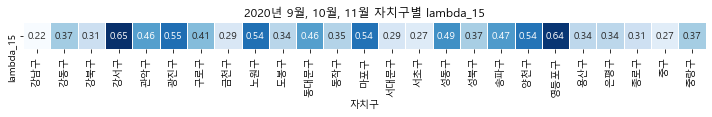

In [43]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [44]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.270873,0.458268,0.305894,0.746748,0.722052,0.823404,0.576594,0.426035,0.525214,0.350533,0.440282,0.449053,0.697208,0.334974,0.414627,0.700686,0.417823,0.559036,0.563214,0.850097,0.425436,0.477447,0.336842,0.297718,0.367766


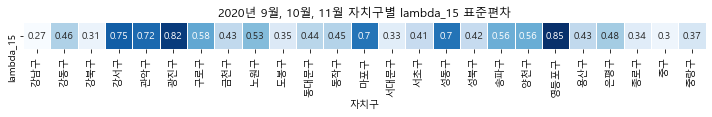

In [45]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [46]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.227785,0.366855,0.312496,0.645475,0.467832,0.542535,0.404251,0.288601,0.54013,0.33928,0.457018,0.350491,0.535581,0.295835,0.277859,0.482562,0.369029,0.468999,0.533664,0.640129,0.33597,0.332794,0.326788,0.283178,0.365144


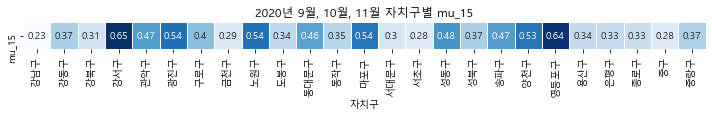

In [47]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [48]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.27236,0.422559,0.297866,0.715644,0.679553,0.746849,0.553117,0.395867,0.514836,0.329366,0.41624,0.392075,0.648506,0.306584,0.389787,0.651282,0.373944,0.553017,0.530964,0.814095,0.411453,0.421944,0.349903,0.312862,0.336726


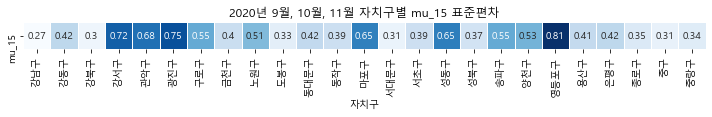

In [49]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [50]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.087328,1.173296,1.169422,1.301177,1.065365,1.104374,1.182248,1.594473,1.105476,1.208299,1.217181,1.075264,1.155013,1.091692,1.107185,1.251142,1.064664,1.205835,1.158865,1.280009,1.12696,1.164802,1.134672,1.143507,1.131597


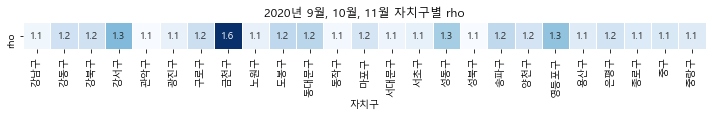

In [51]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 rho')
plt.tight_layout()
plt.show()

In [52]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.938335,1.876048,1.291694,3.558285,2.326821,3.130068,2.063031,1.292371,2.845405,1.778763,2.338712,1.889208,3.135559,1.323704,1.459522,2.729664,1.923911,2.621522,2.997744,3.721448,1.962475,1.832096,1.539859,1.343986,1.829546


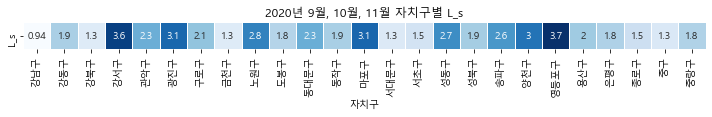

In [53]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [54]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.379538,2.263447,1.254449,3.683815,3.931549,6.34861,2.671749,1.696914,2.5566,1.886863,1.941129,2.654701,4.485445,1.717074,2.570975,4.087159,2.190736,3.244521,2.896662,5.43431,2.513904,2.952436,1.515309,1.328566,1.789704


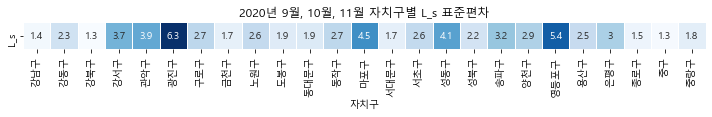

In [55]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [56]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,13.65541,14.445478,9.622599,21.844123,10.324717,16.344859,18.814933,21.646063,14.319349,16.106635,17.094199,13.427238,23.124937,12.424914,19.18041,20.026784,11.901151,23.085209,20.41538,27.911443,20.53535,15.613724,26.201982,28.827684,11.544918


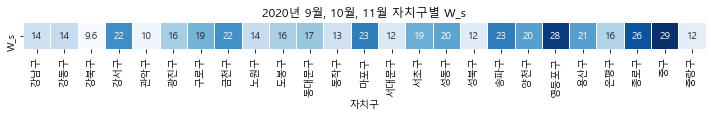

In [57]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [58]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,45.465215,34.020054,20.562449,63.119175,19.553371,47.466439,55.510734,51.685618,29.691247,48.151783,48.408549,45.153135,79.479847,25.390117,62.815211,63.368699,27.913611,100.699771,68.746535,109.153299,59.626201,48.613379,97.406901,116.100286,30.538963


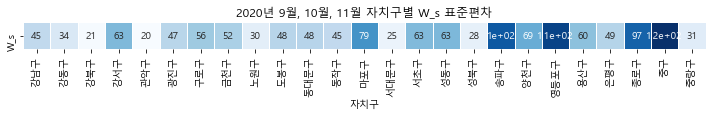

In [59]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [60]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2068,흑석한강푸르지오(110동)
2069,흥국사 정류장
2070,희성오피앙
2071,희훈타워빌 앞


In [61]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [62]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
960,강서구,KC 대학교,0,0.109890,0.024725,4.444444,0.816327,40.444444,학교
961,강서구,KC 대학교,1,0.142857,0.035714,4.000000,0.800000,28.000000,학교
962,강서구,KC 대학교,2,0.082418,0.024725,3.333333,0.769231,40.444444,학교
963,강서구,KC 대학교,3,0.043956,0.027473,1.600000,0.615385,36.400000,학교
964,강서구,KC 대학교,4,0.046703,0.008242,5.666667,0.850000,121.333333,학교
...,...,...,...,...,...,...,...,...,...
49555,동대문구,휘봉고등학교 앞,19,0.428571,0.365385,1.172932,1.105889,4.214169,학교
49556,동대문구,휘봉고등학교 앞,20,0.431319,0.313187,1.377193,1.209801,5.042791,학교
49557,동대문구,휘봉고등학교 앞,21,0.401099,0.280220,1.431373,1.234103,5.669513,학교
49558,동대문구,휘봉고등학교 앞,22,0.445055,0.225275,1.975610,1.422036,7.386246,학교


In [63]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.104396,0.142857,0.730769,1.118461,12.559765,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.118132,0.118132,1.000000,1.500000,16.930233,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.082418,0.096154,0.857143,1.308597,19.735433,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.129121,0.063187,2.043478,2.285015,38.614160,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.038462,0.027473,1.400000,1.907658,80.814679,지하철
...,...,...,...,...,...,...,...,...,...
49651,동작구,흑석역 4번출구,19,0.417582,0.447802,0.932515,0.953458,3.310702,지하철
49652,동작구,흑석역 4번출구,20,0.357143,0.315934,1.130435,1.081531,4.844720,지하철
49653,동작구,흑석역 4번출구,21,0.365385,0.431319,0.847134,0.889907,3.381770,지하철
49654,동작구,흑석역 4번출구,22,0.409341,0.326923,1.252101,1.148633,4.759438,지하철


In [64]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.395604,0.321429,1.230769,2.407714,8.575560,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.277473,0.260989,1.063158,2.122289,9.871961,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.214286,0.192308,1.114286,2.215337,13.701065,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.178571,0.098901,1.805556,3.033511,32.093518,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.120879,0.049451,2.444444,3.365645,69.219691,아파트
...,...,...,...,...,...,...,...,...,...
48835,서대문구,홍은센트레빌 아파트 앞,19,0.137363,0.175824,0.781250,0.000000,0.000000,아파트
48836,서대문구,홍은센트레빌 아파트 앞,20,0.107143,0.076923,1.392857,0.000000,0.000000,아파트
48837,서대문구,홍은센트레빌 아파트 앞,21,0.074176,0.123626,0.600000,0.000000,0.000000,아파트
48838,서대문구,홍은센트레빌 아파트 앞,22,0.115385,0.090659,1.272727,0.000000,0.000000,아파트


In [65]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2520,마포구,가온문화공원,0,0.082418,0.093407,0.882353,1.344236,20.520768,공원
2521,마포구,가온문화공원,1,0.085165,0.057692,1.476190,1.967053,39.056990,공원
2522,마포구,가온문화공원,2,0.016484,0.043956,0.375000,0.519303,32.600515,공원
2523,마포구,가온문화공원,3,0.024725,0.041209,0.600000,0.904412,40.609524,공원
2524,마포구,가온문화공원,4,0.013736,0.021978,0.625000,0.946413,77.244186,공원
...,...,...,...,...,...,...,...,...,...
49483,중구,훈련원공원주차장 앞,19,0.304945,0.423077,0.720779,1.373754,4.969936,공원
49484,중구,훈련원공원주차장 앞,20,0.285714,0.365385,0.781955,1.520531,6.014766,공원
49485,중구,훈련원공원주차장 앞,21,0.274725,0.354396,0.775194,1.504494,6.172209,공원
49486,중구,훈련원공원주차장 앞,22,0.184066,0.398352,0.462069,0.751390,4.187062,공원


In [66]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.109890,0.024725,4.444444,0.816327,40.444444,학교
1,강서구,KC 대학교,1,0.142857,0.035714,4.000000,0.800000,28.000000,학교
2,강서구,KC 대학교,2,0.082418,0.024725,3.333333,0.769231,40.444444,학교
3,강서구,KC 대학교,3,0.043956,0.027473,1.600000,0.615385,36.400000,학교
4,강서구,KC 대학교,4,0.046703,0.008242,5.666667,0.850000,121.333333,학교
...,...,...,...,...,...,...,...,...,...
20083,중구,훈련원공원주차장 앞,19,0.304945,0.423077,0.720779,1.373754,4.969936,공원
20084,중구,훈련원공원주차장 앞,20,0.285714,0.365385,0.781955,1.520531,6.014766,공원
20085,중구,훈련원공원주차장 앞,21,0.274725,0.354396,0.775194,1.504494,6.172209,공원
20086,중구,훈련원공원주차장 앞,22,0.184066,0.398352,0.462069,0.751390,4.187062,공원


In [67]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.292530  0.187606  0.130996  0.083501  0.058485  0.051405  0.095705   
아파트  0.293035  0.201833  0.133030  0.081602  0.056953  0.045647  0.052907   
지하철  0.371775  0.287267  0.201797  0.133222  0.090394  0.098390  0.178903   
학교   0.242480  0.172736  0.112296  0.073955  0.048849  0.035213  0.048448   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.182428  0.402657  0.268808  0.248098  0.291631  0.390216  0.416394   
아파트  0.154707  0.314576  0.196338  0.178134  0.226603  0.295330  0.321791   
지하철  0.417868  0.721267  0.476695  0.395087  0.473596  0.589843  0.637296   
학교   0.138265  0.322351  0.213524  0.184347  0.204781  0.274344  0.306810   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.452425  0.534922  0.632317  0.771555  0.938081  0.781197  0.650122   
아파트  0.345173  0.396631  0.464573  0.604320  0.825142  0.690828  0.549405   
지하철  0.684683  0.762548  0.883859  1.141968  1.383242  1.070473  0.853380   
학교   0.315774  0.359790  0.412369  0.497293  0.651360  0.537860  0.452114   

                                   
시간         21        22        23  
특성                                 
공원   0.653740  0.579565  0.422152  
아파트  0.554628  0.544711  0.400269  
지하철  0.819464  0.710477  0.501400  
학교   0.450409  0.429795  0.325158

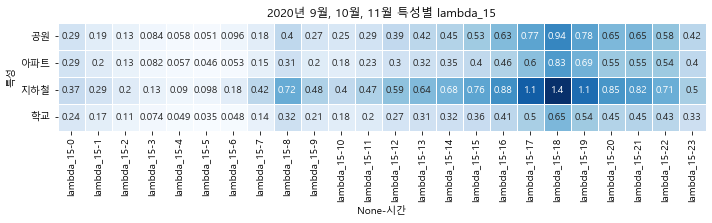

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.274918  0.184464  0.131271  0.083802  0.059620  0.065489  0.120276   
아파트  0.221440  0.159197  0.110237  0.072544  0.056041  0.049472  0.062798   
지하철  0.342607  0.256253  0.183416  0.121398  0.081868  0.105034  0.193081   
학교   0.225149  0.157836  0.110211  0.079386  0.047092  0.039515  0.057970   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.274938  0.487687  0.285083  0.230344  0.265869  0.336070  0.371818   
아파트  0.278293  0.591520  0.210771  0.158864  0.186617  0.261218  0.267563   
지하철  0.475502  0.763362  0.439014  0.339878  0.407554  0.508248  0.557829   
학교   0.142924  0.364325  0.232949  0.183591  0.181762  0.244296  0.272227   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.420390  0.523151  0.640003  0.698482  0.768910  0.656817  0.573768   
아파트  0.279641  0.315738  0.376085  0.472865  0.630146  0.525982  0.425198   
지하철  0.619864  0.744385  0.911128  1.152766  1.315830  1.070015  0.933169   
학교   0.293042  0.361176  0.430296  0.507758  0.624308  0.523606  0.428873   

                                   
시간         21        22        23  
특성                                 
공원   0.597896  0.530964  0.386430  
아파트  0.428096  0.412770  0.296967  
지하철  0.921917  0.762086  0.511365  
학교   0.424056  0.391957  0.288532

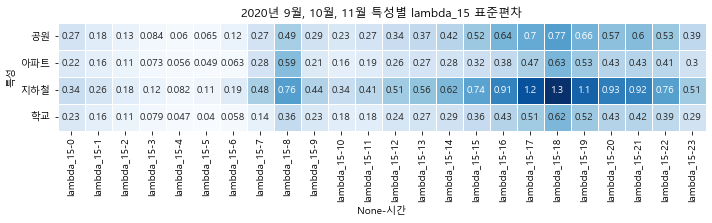

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.224509  0.160609  0.103207  0.065089  0.048315  0.070742  0.140480   
아파트  0.223237  0.160322  0.102931  0.068636  0.051322  0.072183  0.166964   
지하철  0.360255  0.253364  0.181339  0.124615  0.080725  0.071382  0.138909   
학교   0.174741  0.127637  0.081174  0.053481  0.039203  0.056750  0.127196   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.406514  0.520842  0.341214  0.302858  0.361739  0.437975  0.454565   
아파트  0.411937  0.508981  0.294349  0.264159  0.294620  0.342063  0.358139   
지하철  0.379592  0.741579  0.469548  0.400409  0.489529  0.598443  0.668551   
학교   0.310821  0.415938  0.257941  0.237026  0.268429  0.314791  0.341582   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.501268  0.572432  0.668216  0.779216  0.855347  0.634721  0.592667   
아파트  0.389672  0.429070  0.490415  0.593271  0.684398  0.542673  0.496000   
지하철  0.730855  0.809438  0.909380  1.137894  1.387044  1.053585  0.886407   
학교   0.379402  0.414514  0.474513  0.526189  0.536155  0.439500  0.399013   

                                   
시간         21        22        23  
특성                                 
공원   0.548605  0.445372  0.295066  
아파트  0.459410  0.386834  0.262831  
지하철  0.809942  0.670522  0.475188  
학교   0.363881  0.317478  0.218878

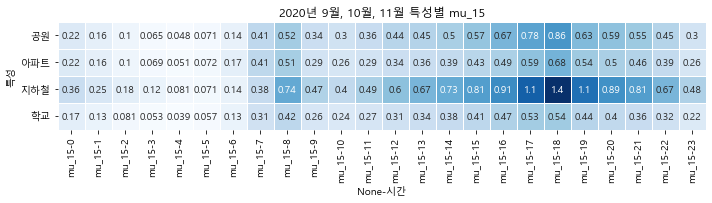

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [73]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.201234  0.146364  0.099297  0.062790  0.056518  0.077882  0.135036   
아파트  0.167005  0.124827  0.078593  0.058435  0.050020  0.069531  0.140662   
지하철  0.325731  0.227570  0.165070  0.118176  0.077566  0.071701  0.131778   
학교   0.167449  0.117093  0.079688  0.053650  0.047227  0.070017  0.137782   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.387865  0.466012  0.260585  0.233296  0.278346  0.342284  0.374126   
아파트  0.347592  0.433732  0.224222  0.189807  0.255684  0.247867  0.246181   
지하철  0.386949  0.734269  0.383076  0.311280  0.383688  0.479333  0.557792   
학교   0.309169  0.363889  0.204414  0.170977  0.195576  0.242485  0.268775   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.440995  0.528816  0.596064  0.686375  0.710935  0.544944  0.519800   
아파트  0.279779  0.317661  0.373573  0.521967  0.561663  0.416153  0.387764   
지하철  0.648069  0.753985  0.882504  1.076192  1.281353  1.008318  0.900880   
학교   0.301558  0.361952  0.415328  0.490528  0.506670  0.428753  0.383609   

                                   
시간         21        22        23  
특성                                 
공원   0.485556  0.383906  0.264085  
아파트  0.358885  0.300846  0.204183  
지하철  0.840575  0.689987  0.478908  
학교   0.357588  0.338519  0.225423

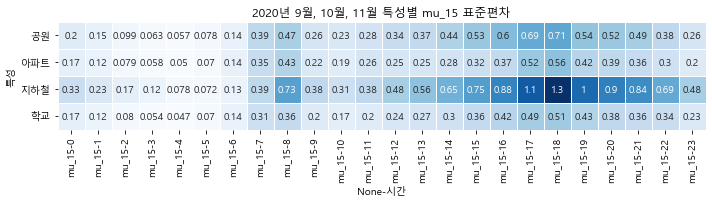

In [74]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [75]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.303633  1.216244  1.396354  1.639391  1.850841  1.492372  1.605460   
아파트  1.477825  1.385428  1.407576  1.447362  1.443992  1.019898  0.487870   
지하철  1.019798  1.198200  1.178998  1.159675  1.608710  2.149931  1.776778   
학교   1.498879  1.463192  1.568172  1.618139  1.981475  1.333385  0.888869   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.688161  1.023327  0.913661  0.836866  0.779772  0.853626  0.874562   
아파트  0.460658  0.594921  0.655372  0.660227  0.747522  0.799984  0.822124   
지하철  1.408542  1.079196  1.033377  0.990350  0.945995  0.966455  0.935353   
학교   1.410098  1.302310  1.028634  0.843586  0.737368  0.857063  0.895996   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.870121  0.912800  0.910356  1.016024  1.160938  1.262790  1.109432   
아파트  0.824001  0.893526  0.911048  1.041706  1.268372  1.304635  1.145287   
지하철  0.924476  0.937382  0.963484  1.001168  1.001759  1.009872  0.954409   
학교   0.799208  0.838437  0.817323  0.935425  1.214209  1.252663  1.122171   

                                   
시간         21        22        23  
특성                                 
공원   1.246041  1.326721  1.552181  
아파트  1.243127  1.513381  1.727828  
지하철  1.002613  1.083870  1.068798  
학교   1.262280  1.522562  1.662176

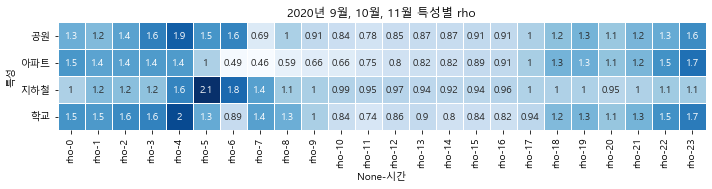

In [76]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 rho')
plt.tight_layout()
plt.show()

In [77]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.826790  2.688208  2.814370  2.650267  2.717476  1.746671  1.515999   
아파트  2.301093  2.249950  2.321819  2.140357  2.066241  1.193266  0.646475   
지하철  3.035963  3.430713  3.485253  3.357958  3.488054  4.146342  3.597864   
학교   1.850350  1.834215  1.840872  1.741081  1.644332  1.064114  0.795987   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.186263  1.801712  1.617567  1.593937  1.648634  1.869288  1.990311   
아파트  0.639240  0.972622  1.074702  1.090404  1.312856  1.538492  1.607048   
지하철  3.299241  3.069042  3.156351  2.942515  3.001904  3.214536  2.800784   
학교   0.869732  1.224761  1.167393  1.141293  1.145021  1.327123  1.338015   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.911936  2.098673  2.238066  2.346362  2.557765  2.755702  2.450953   
아파트  1.593235  1.679447  1.750663  1.915285  2.153270  2.243063  1.987991   
지하철  2.697345  2.870178  3.142605  3.283421  3.212354  3.215244  2.935568   
학교   1.247686  1.346095  1.365956  1.469803  1.763675  1.765688  1.663470   

                                   
시간         21        22        23  
특성                                 
공원   2.690365  2.840768  2.933421  
아파트  2.161581  2.421785  2.496435  
지하철  3.134156  3.262956  3.086198  
학교   1.780067  1.829919  1.930122

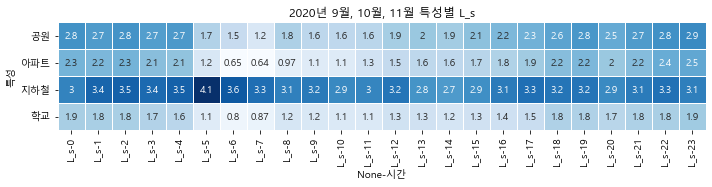

In [78]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 L_s')
plt.tight_layout()
plt.show()

In [79]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.097535  3.204885  3.357332  3.083062  3.628902  3.181479  2.654867   
아파트  2.388279  2.325672  2.482024  2.305159  2.377274  1.452028  1.087294   
지하철  3.751931  4.614533  5.073454  5.235698  5.079034  6.465635  5.243394   
학교   2.076658  2.128328  2.186900  2.028348  2.104700  1.762481  1.580520   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.518499  3.302889  2.463122  1.970598  1.832241  1.854671  2.141616   
아파트  1.231817  1.532984  1.336812  1.175051  1.274331  1.693263  1.626946   
지하철  5.202537  4.476514  5.053867  3.653961  3.759834  5.062753  3.067763   
학교   1.754024  2.215476  1.878165  1.757081  1.573892  1.860549  1.742180   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.837600  2.168308  2.464317  2.477928  2.747333  2.867143  2.468462   
아파트  1.530044  1.715120  1.739175  1.917151  2.113782  2.185235  1.912110   
지하철  2.699951  3.770005  4.893562  4.891542  5.068934  5.128808  4.893009   
학교   1.399723  1.651677  1.728765  1.798673  2.126797  2.155539  1.902527   

                                   
시간         21        22        23  
특성                                 
공원   2.880463  3.047481  3.248243  
아파트  2.165289  2.462000  2.473718  
지하철  5.178938  5.185303  4.351367  
학교   2.083765  1.935355  2.172418

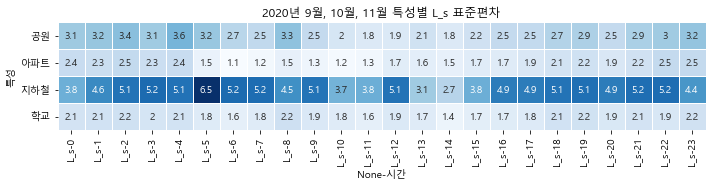

In [80]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [81]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원   14.250756  23.097619  45.901781  82.062651  141.154541   78.793108   
아파트  11.564860  17.194545  30.134638  48.113437   72.501447   46.222172   
지하철  11.128738  18.598179  27.697265  43.500136   93.309165  109.495110   
학교   14.012505  20.627366  41.862187  57.477300   90.615408   70.627427   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   30.059412   8.467937  6.446998  7.314377  7.532087  6.210598  5.330546   
아파트  13.933590   5.220325  3.712681  5.784106  6.394145  6.266443  5.494781   
지하철  44.565224  14.121438  5.968937  7.932061  8.315523  6.873468  5.720933   
학교   33.042863  17.642603  7.202840  7.306157  7.130663  6.055102  5.401168   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   5.184020  4.775455  4.489865  3.924347  3.499418  3.351214  4.570073   
아파트  5.247348  4.872499  4.576702  4.084717  3.679691  3.365227  4.093537   
지하철  4.876345  4.494873  4.141088  3.827409  3.163636  2.593470  3.413665   
학교   5.021520  4.492083  4.338408  3.740499  3.493669  3.616676  4.547050   

                                              
시간         20        21        22         23  
특성                                            
공원   4.695667  5.450793  6.749925  11.034115  
아파트  4.231166  4.776418  6.212307   9.654186  
지하철  4.010110  4.596899  5.878924   8.467338  
학교   5.058364  5.884628  7.577113  10.925442

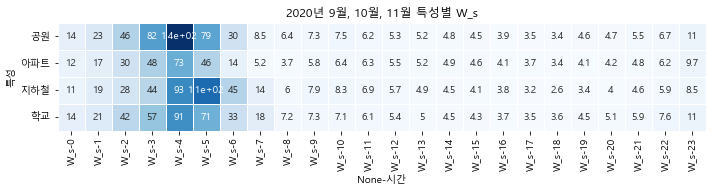

In [82]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 W_s')
plt.tight_layout()
plt.show()

In [83]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원    9.356908  23.352592  71.066724  135.519771  268.955408  157.507269   
아파트   9.862911  16.198111  38.053088   62.298797   92.931125   77.806784   
지하철  10.196587  19.707492  35.382907   60.599877  206.189137  173.121095   
학교   11.372490  21.034163  76.016524   85.545023  132.485982  150.754454   

                                                                              \
시간          6          7          8         9         10        11        12   
특성                                                                             
공원   40.909137  11.751342   8.113195  6.365573  5.215660  3.459990  2.791935   
아파트  20.068807   8.284372   3.872712  4.250671  4.859761  4.333137  3.488615   
지하철  62.766822  16.651476   5.245630  6.005841  4.706910  3.715583  2.954086   
학교   71.271356  50.414708  11.899561  6.759254  5.266092  4.022668  3.468750   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   2.553653  2.412175  2.503537  2.139071  1.920685  1.955656  2.270037   
아파트  3.182196  2.979419  2.838865  2.415197  2.235387  2.157619  2.428829   
지하철  2.213640  2.004183  1.826089  1.747384  1.513562  1.305628  1.563634   
학교   2.944784  2.673699  2.635529  2.204573  2.104910  2.133631  2.727736   

                                             
시간         20        21        22        23  
특성                                           
공원   2.446457  2.964873  3.785222  6.757657  
아파트  2.536595  2.967984  4.319052  7.412273  
지하철  2.028343  2.632914  3.863106  6.243973  
학교   3.391875  4.197010  6.252725  9.612234

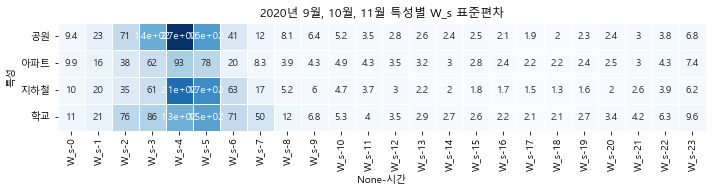

In [84]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 9월, 10월, 11월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()